In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as pgo

import glob
# import tensorflow as tf
# tf.test.gpu_device_name()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [2]:
import io
data_file = pd.read_excel('identificadoresGabarito.xlsx',sheet_name = "identificadores")
df = data_file

In [3]:
#Exploring data
df.head()


,Unnamed: 0,GRUPO_DONO_SERVICO,SOLICITANTE,ANALISTA,SERVICO,GRUPO_SOLUCIONADOR,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR
0,0,CSMOP SISTEMICO N2,Conceicao Aparecida Campanha Tassi,GPI - Danilo Gomes Moreno,CONCEDER BENEFICIOS,CSMOP SISTEMICO N2,726,805,1020,703,726
1,1,CYBERSECURITY N2,Leandro Silva Da Cruz,Atos - Felipe Gonçalves da Silva,NaN,SERVICE DESK CYBERSERCURITY N1,728,1233,591,1837,1544
2,2,COAIS INFRAESTRUTURA,Maria Cristina Messias dos Santos,Atos - Felipe Gonçalves da Silva,OUTLOOK,SERVICE DESK ATOS (FSN1),692,1332,591,1403,1540
3,3,CSMOP SISTEMICO N2,Vitor Cesar Lopes De Souza,Spread - José Luiz Cabral de Avelar,SERVICO DE PORTABILIDADE,COSIP/COIMP SISTEMICO N2,726,1793,1673,1595,718
4,4,CYBERSECURITY N2,Rodolfo Leme Pezetta,Atos - Danilo Ribeiro Domingues,NaN,SERVICE DESK ATOS (FSN2),728,1511,583,1837,1541


In [4]:
df.describe()

,Unnamed: 0,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR
count,67417.000000,67417.000000,67417.000000,67417.000000,67417.000000,67417.000000
mean,33708.000000,835.526662,974.348102,876.740748,1318.866992,1180.903986
std,19461.755886,342.238970,519.439033,446.528412,485.960109,410.803356
min,0.000000,671.000000,6.000000,132.000000,0.000000,19.000000
25%,16854.000000,695.000000,608.000000,603.000000,892.000000,724.000000
50%,33708.000000,724.000000,988.000000,630.000000,1452.000000,1540.000000
75%,50562.000000,728.000000,1346.000000,1068.000000,1837.000000,1543.000000
max,67416.000000,1837.000000,1838.000000,1837.000000,1837.000000,1837.000000


In [5]:
df1 = pd.crosstab(index = df['ID_GRUPO_SOLUCIONADOR'], columns = df['ID_SERVICO']).reset_index()
df1

ID_SERVICO,ID_GRUPO_SOLUCIONADOR,0,1,2,3,4,5,7,17,23,...,1694,1696,1752,1753,1755,1759,1801,1802,1806,1837
0,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,671,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1548,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1818
59,1549,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
60,1550,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,608
61,1614,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


In [6]:
# Definindo função para validar probabilidade de aparecer determinado grupo solucionador
def probStatus(dataset, group_by):
    df1 = pd.crosstab(index = dataset[group_by], columns = dataset['ID_GRUPO_SOLUCIONADOR']).reset_index()
    df1['Yes'] = df1.iloc[:,1:].sum(axis =1)
    df1['No'] = (df1 == 0).sum(axis = 1)
    df1['probShowUp'] = (df1['Yes'] / (df1['Yes'] + df1['No'])).astype(float)
    return df1[[group_by, 'probShowUp']]


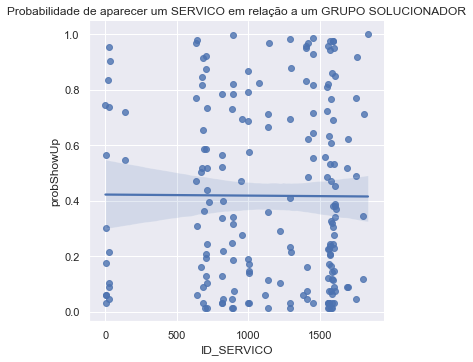

In [7]:

# Probabilidade de relação entre serviço e grupo solucionador
sns.lmplot(data = probStatus(df, 'ID_SERVICO'), x = 'ID_SERVICO', y = 'probShowUp',  fit_reg = True)
plt.xlim()
plt.title('Probabilidade de aparecer um SERVICO em relação a um GRUPO SOLUCIONADOR')
plt.show()



In [8]:
df1['Yes'] = df1.iloc[:,1:].sum(axis =1).astype(int)
df1['No'] = (df1 == 0).sum(axis = 1)
df1['probShowUp'] = (df1['Yes'] / (df1['Yes'] + df1['No'])).astype(float)
df1

ID_SERVICO,ID_GRUPO_SOLUCIONADOR,0,1,2,3,4,5,7,17,23,...,1753,1755,1759,1801,1802,1806,1837,Yes,No,probShowUp
0,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,189,0.005263
1,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,188,0.010526
2,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,189,0.005263
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,189,0.005263
4,671,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,14,943,177,0.841964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1548,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1818,1818,189,0.905830
59,1549,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,16,189,0.078049
60,1550,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,608,608,189,0.762861
61,1614,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,17,19,187,0.092233


In [9]:
#qtde de grupos
solucionador = df.ID_GRUPO_SOLUCIONADOR.nunique()

In [10]:
#qtde de serviços
servico = df.ID_SERVICO.nunique()

In [11]:
#Agrupamento de qtde de serviço por grupo solucionador
sub_df = df.groupby(['ID_GRUPO_SOLUCIONADOR']).ID_SERVICO.nunique().reset_index().sort_values(by = 'ID_SERVICO')
sub_df.columns = ['ID_GRUPO_SOLUCIONADOR', 'QTD_SERVICO']
sub_df['ID_SERVICO'] = df['ID_SERVICO']
sub_df['GRUPO_SOLUCIONADOR'] = df['GRUPO_SOLUCIONADOR']
sub_df.sort_values(by = 'QTD_SERVICO', ascending = False)

,ID_GRUPO_SOLUCIONADOR,QTD_SERVICO,ID_SERVICO,GRUPO_SOLUCIONADOR
53,1543,94,711,CSMOP SISTEMICO N2
10,692,82,1452,CIGEC SISTEMICO N2
50,1540,81,1568,SERVICE DESK ATOS SISTEMICO N1
51,1541,77,1568,SERVICE DESK ATOS SISTEMICO N1
54,1544,73,711,CSMOP SISTEMICO N2
...,...,...,...,...
3,22,1,1595,COSIP/COIMP SISTEMICO N2
2,21,1,1403,SERVICE DESK ATOS (FSN1)
60,1550,1,1554,COFAL SISTEMICO N2
42,830,1,1574,SERVICE DESK ATOS SISTEMICO N1


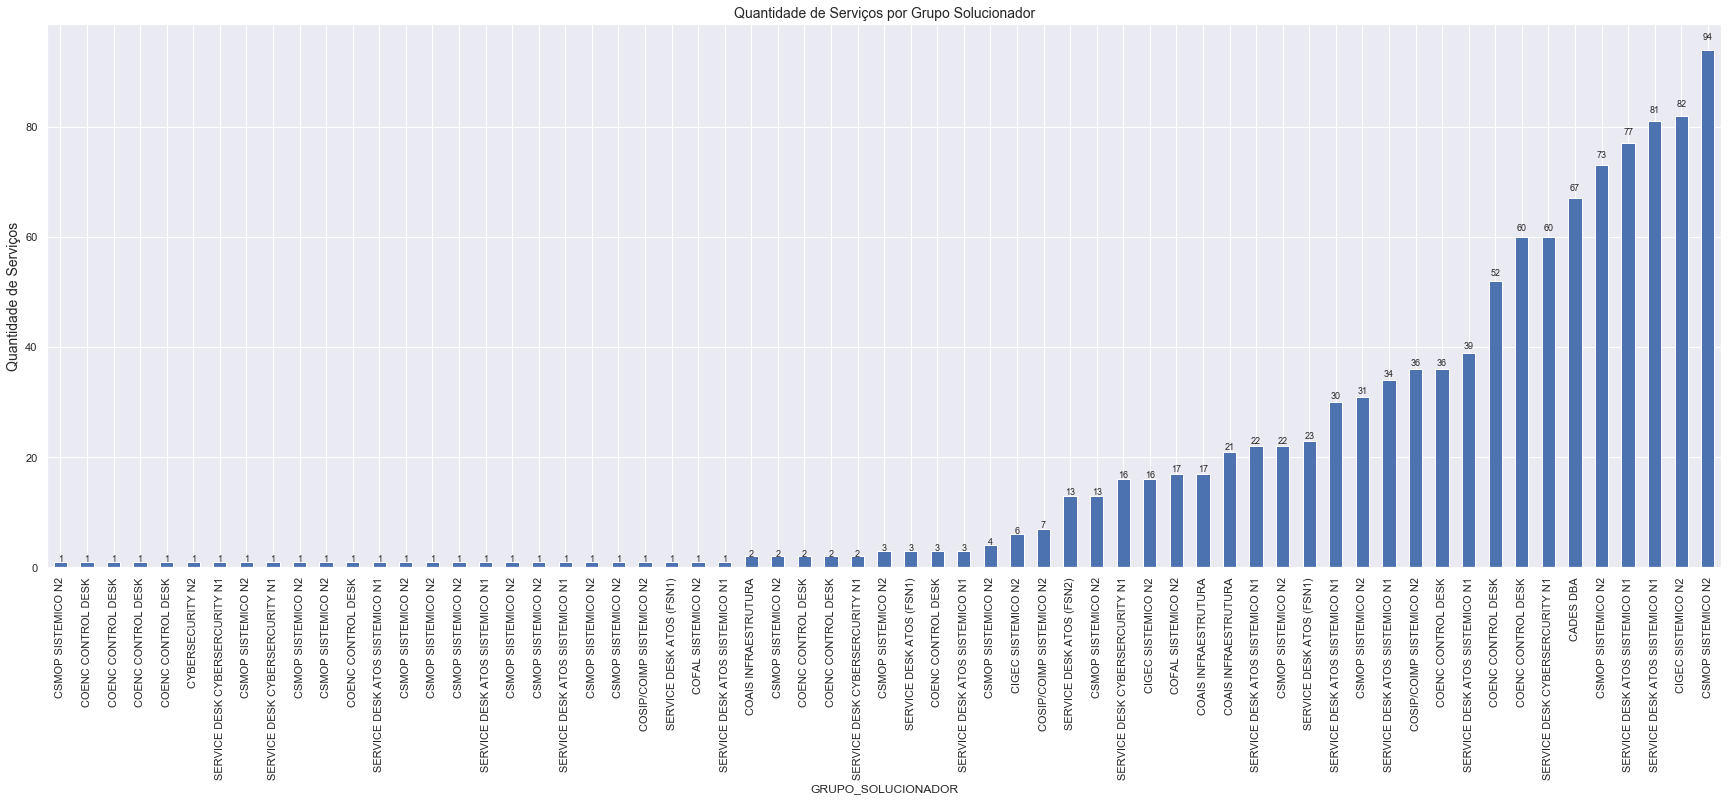

In [12]:
# plotting bar chart qtd_servico
ax = sub_df.plot.bar( x = 'GRUPO_SOLUCIONADOR', y = 'QTD_SERVICO', figsize= (30,10), legend = False)
plt.title("Quantidade de Serviços por Grupo Solucionador", size = 14)
ax.set_ylabel('Quantidade de Serviços', size = 14)
# Add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize= 9)


plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Clusterização GRUPO SOLUCIONADOR x SERVIÇO')

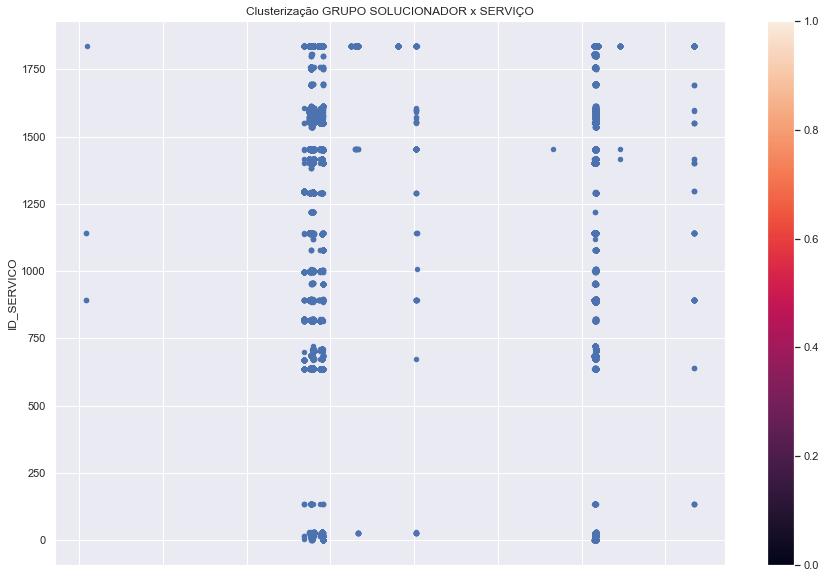

In [13]:

clusters = 2
kmeans = KMeans(n_clusters=clusters)

df_kmeans = df[['ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR']].iloc[:len(df)]
df_kmeans = df[['ID_GRUPO_SOLUCIONADOR', 'ID_SERVICO']].iloc[:len(df)]


kmeans.fit(df_kmeans)

df.plot.scatter(x='ID_GRUPO_SOLUCIONADOR', y='ID_SERVICO', colormap='viridis', figsize=(15, 10))
plt.title('Clusterização GRUPO SOLUCIONADOR x SERVIÇO')

Text(0.5, 1.0, 'Clusterização GRUPO SOLUCIONADOR x SERVIÇO')

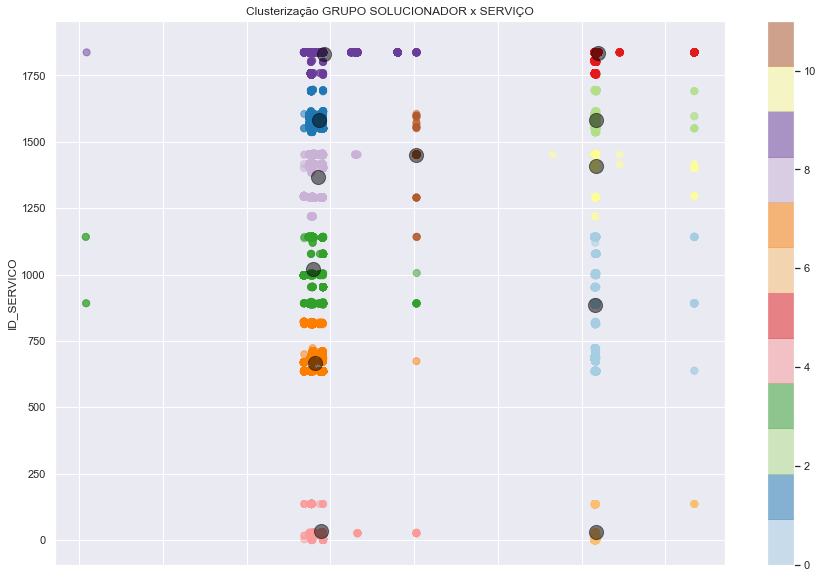

In [14]:

clusters = 12
kmeans = KMeans(n_clusters=clusters)

df_kmeans = df[['ID_GRUPO_SOLUCIONADOR', 'ID_SERVICO']].iloc[:len(df)]


model = kmeans.fit(df_kmeans)
y_pred = kmeans.predict(df_kmeans) #predicting labels (y) and saving to y_pred 
centers = kmeans.cluster_centers_ #cluster centers as determined by the k-means estimator

#ploting cluster
df.plot.scatter(x='ID_GRUPO_SOLUCIONADOR', y='ID_SERVICO',c=y_pred, cmap=plt.cm.Paired, figsize=(15, 10), s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Clusterização GRUPO SOLUCIONADOR x SERVIÇO')



In [15]:
#Show the cluster
df['cluster'] = y_pred
df.iloc[:60]

,Unnamed: 0,GRUPO_DONO_SERVICO,SOLICITANTE,ANALISTA,SERVICO,GRUPO_SOLUCIONADOR,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR,cluster
0,0,CSMOP SISTEMICO N2,Conceicao Aparecida Campanha Tassi,GPI - Danilo Gomes Moreno,CONCEDER BENEFICIOS,CSMOP SISTEMICO N2,726,805,1020,703,726,7
1,1,CYBERSECURITY N2,Leandro Silva Da Cruz,Atos - Felipe Gonçalves da Silva,NaN,SERVICE DESK CYBERSERCURITY N1,728,1233,591,1837,1544,5
2,2,COAIS INFRAESTRUTURA,Maria Cristina Messias dos Santos,Atos - Felipe Gonçalves da Silva,OUTLOOK,SERVICE DESK ATOS (FSN1),692,1332,591,1403,1540,10
3,3,CSMOP SISTEMICO N2,Vitor Cesar Lopes De Souza,Spread - José Luiz Cabral de Avelar,SERVICO DE PORTABILIDADE,COSIP/COIMP SISTEMICO N2,726,1793,1673,1595,718,1
4,4,CYBERSECURITY N2,Rodolfo Leme Pezetta,Atos - Danilo Ribeiro Domingues,NaN,SERVICE DESK ATOS (FSN2),728,1511,583,1837,1541,5
5,5,CSMOP SISTEMICO N2,Jose Adeilson Soares,Henrique Soares Ventura,SERVICO DE RESGATE,COAIS INFRAESTRUTURA,726,1180,1132,1598,692,1
6,6,COENC ATIVOS,Juarez Domingos Frasson Vidotto,Atos - Yonara Eloy da Costa,ESTACAO TRABALHO,SERVICE DESK ATOS (FSN1),695,1193,632,892,1540,0
7,7,COFAL SISTEMICO N2,Rosilene De Almeida Moreira,Fabio Rodrigo Saijo,CALCULAR E CONCILIAR PROVISOES BR E USGAAP,CSMOP SISTEMICO N2,698,1533,960,673,726,7
8,8,GETEC SISTEMICO N2,Viviane Veronica Cascardo Nardini,Diogo Vilela de Souza,RELACIONAR COM CLIENTES,CIGEC SISTEMICO N2,1007,1799,880,1452,687,8
9,9,CSMOP SISTEMICO N2,Janine Defensor De Moura,Atos - Renata Toncovitch das Neves,SERVICO DE PORTABILIDADE,SERVICE DESK ATOS SISTEMICO N1,726,1160,624,1595,1543,2


In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
df_cluster = df[['ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR']]
df_cluster
# cluster.fit_predict(df_cluster)

# plt.figure(figsize=(10, 7))
# plt.scatter(df_cluster.ID_GRUPO_SOLUCIONADOR, df_cluster.ID_SERVICO, c=cluster.labels_, cmap='rainbow')


,ID_SERVICO,ID_GRUPO_SOLUCIONADOR
0,703,726
1,1837,1544
2,1403,1540
3,1595,718
4,1837,1541
...,...,...
67412,1590,1543
67413,1837,1837
67414,1837,1837
67415,638,697
